# **Tutorial REC1**
This tutorial demonstrates how to run a simulation  from the src/example_model folder in the pyRES package.

The tutorial shows how to:

1. Prepare the input files (CSV and YAML).

2. Use the provided config.py script to generate the YAML configuration.

3. Run the simulation using main.py.

4. Generate and analyze the results saved in the Output folder.


----
---

## **Example model Structure**

Below is the structure of the REC1 model located in
src/example_model/

```text
Rec1/
│
├── Input/                       # Simulation input 
│   ├── demand_qc_kw_el.csv      # Demand data (CSV file)
│   └── config.yaml              # Configuration file for the simulation (YAML file)
│
├── Output/                      # Simulation output   
│   ├── prosumer1_electricity_Summer.png
│   ├── prosumer2_electricity_Winter.png
│   ├── rec1_electricity_bar.png
│   └── ...                    
│
├── config.py                    # Script to generate config.yaml
├── main.py                      # Main simulation script
└── Rec1.xlsx                    # Excel file summarizing the main parameters 
```

## **Step0- Create Your Own Test Folder**

To test the code, we first create a new folder named jpt_ntb_test inside src/example_model/.
Then, we copy the necessary files from Rec1/ to jpt_ntb_test/.


In [37]:
from pathlib import Path
import shutil
import os

src_base = Path("src/example_model/Rec1")
test_base = Path("src/example_model/jpt_ntb_test")

(test_base / "Input").mkdir(parents=True, exist_ok=True)
(test_base / "Output").mkdir(parents=True, exist_ok=True)

files = [
    src_base / "main.py",
    src_base / "config.py",
    src_base / "Input" / "demand_qc_kw_el.csv",
]

copied = []

for src in files:
    if src.exists():
        if "Input" in src.parts:
            dst = test_base / "Input" / src.name
        else:
            dst = test_base / src.name
        shutil.copy2(src, dst)
        copied.append(str(dst))

---
---

## **Step1- Prepare Input Data**

Before running a simulation, you need two input files inside the Input/ folder:

- demand_qc_kw_el.csv:

    - This file contains the energy demand profiles (kW) for all consumers and prosumers.
    
    - Each column represents a different user profile (e.g. supermarket, school, residential, …).
    
    - Each row represents a time step (e.g. 15 minutes).
    
    - All columns must have the same length, which depends on the analyzed period and the chosen time resolution.
    For example: One year with a 15-minute resolution → 35,040 rows, One year with an hourly resolution → 8,760 rows.
      
    - The prosumer profiles should be placed first, followed by the consumer profiles. In this tutorial user0 and user1 are prosumers, while user2 to user51 are consumers.

- config.yaml:
    
   - This file defines the simulation parameters: systems, consumers, prosumers, and the energy community.

   - It can be generated automatically using the config.py script below.

---
---

## **Step2 - Generate the YAML Configuration**

The script config.py automatically creates a ready-to-use config.yaml file inside the Input/ folder.


In [38]:
import yaml

Python module to read and write YAML files

In [39]:
demand_file = os.path.join("Input/demand_qc_kw_el.csv")

Path to CSV with demand data (kW) for all consumers and prosumers.

In [40]:
simulation_dict={
        "time_step": '15min', "start_date": '01-01-2020', 'time_horizon': 20, "demand_curve_file": demand_file

    }

simulation_dict is a dictionary that contains the main simulation parameters:

- time_step: defines the temporal resolution, meaning that the model processes data in 15-minute intervals. This determines how often the energy demand, production, and other variables are updated.
- start_date :  indicates the starting date of the simulation period. (DD-MM-YYYY)
- time_horizon → 20 represents the time horizon for economic analysis

demand_curve_file → path to CSV with demand data


In [41]:
users_dict = {}

users_dict is a dictionary that contain demand profiles imported from demand_qc_kw_el.csv.


In [42]:
n_users = 52

for i in range(n_users):
    users_dict[f"user{i}"] = {
        "id": f"{i}",
        "carriers": {
            "electricity": {
                "column": f"user{i}"
            }
        }
    }


Multiple users are automatically added to the users_dict. 
- id: a code that uniquely identifies each user (id0, id1, …, id51)
- carriers: energy vector 
- column: name of the column in demand_qc_kw_el.csv where the user’s demand curve is stored (user0, user1, …, user52)


In [43]:
consumers_list = [f"user{i}" for i in range(2, n_users)]

Create a list of consumers based on the profiles imported in the dictionary dict_users. From user2 to user51 are consumers.

In [44]:
systems_dict = {'pv1':
                    {'tech': {"id": "pv1", "lat": 41.9027835,
                              "lon": 12.496365, "n_series": 30, "n_parallel": 10, "tilt": 30, "azimuth": 0},
                     'economics': {'cap_cost': 1500, 'opex_cost': 40, 'inc_year': min(0.5*30*10*0.4*1500,96000)/10, 'inc_start_end': [1, 10],
                                   'tax_year': 0, 'other_cost': {'item1': {'unit': 30*10*0.4, 'cost_unit': 350, 'dur': [10, 10]}},
                                   'other_rev': {'item1': {'unit': 0, 'rev_unit': 0, 'dur': [0, 0]}}}, },
                'pv2':
                    {'tech': {"id": "pv1", "lat": 41.891159,
                              "lon": 12.492059, "n_series": 13, "n_parallel": 12, "tilt": 30, "azimuth": 0},
                     'economics': {'cap_cost': 1500, 'opex_cost': 40, 'inc_year': min(0.5*13*12*0.4*1500,96000)/10, 'inc_start_end': [1, 10],
                                   'tax_year': 0, 'other_cost': {'item1': {'unit': 13*12*0.4, 'cost_unit': 350, 'dur': [10, 10]}},
                                   'other_rev': {'item1': {'unit': 0, 'rev_unit': 0, 'dur': [0, 0]}}}, },
                'pv3':
                    {'tech': {"id": "pv1", "lat": 41.893483,
                              "lon": 12.492477, "n_series": 11, "n_parallel": 11, "tilt": 30, "azimuth": 0},
                     'economics': {'cap_cost': 1500, 'opex_cost': 40, 'inc_year':0, 'inc_start_end': [0, 0],
                                   'tax_year': 0, 'other_cost': {'item1': {'unit': 11*11*0.4, 'cost_unit': 350, 'dur': [10, 10]}},
                                   'other_rev': {'item1': {'unit': 0, 'rev_unit': 0, 'dur': [0, 0]}}}, }
                }


systems_dict is a dictionary containing production systems. Each system is defined by tech and economic parameters.  
- id: a code that uniquely identifies each system (pv1,pv2)
- lat, lon: geographic coordinates (World Geodetic System 84 (WGS 84))
- n_series, n_parallel: number of modules in series and parallel
- tilt: panel tilt angle from horizontal (°C)
- azimuth:  panel horizontal orientation (°C)
- cap_cost: initial cost (€/kW)
- opex_cost: operational cost (€/kW)
- inc_year: incentive value per year (€/year)
- inc_start_end: incentive start and end year. e.g: 'inc_year':min(0.5x720x2.560x2x2,96000)/10, 'inc_start_end': [1, 10], simulates the Bonus50% that provides a 50% of the initial component cost, with a maximum limit of 96,000 €, and this amount is distributed over 10 years (from year 1 to year 10).
- tax_year:  taxes (€/year). It is a fixed tax amount that remains constant every year throughout the analysis period.
- other_cost:  is a dictionary used to define additional costs. Each entry (e.g. 'item1') includes:
    - unit: the unit of measurement for the cost (e.g., kWh, kg, etc.)
    - cost_unit: the unit cost value (e.g €/kWh, €/kg, etc.)
    - dur: a list representing the start and end of the cost duration 
    - e.g. {'item1': {'unit': 30x10x0.4, 'cost_unit': 350, 'dur': [10, 10]}} simulates the inverter replacement, a cost of 350 €/kW per 62.4 kW will be added at year 10. 
- other_rev: is a dictionary used to define additional revenues. Each entry (e.g. 'item1') includes:
    - unit: the unit of measurement for the revenue (e.g. kWh, kg, etc.)
    - rev_unit: the unit revenue value (e.g €/kWh, €/kg, etc.)
    - dur: a list representing the start and end of the revenue duration.
    - e.g. {'item1': {'unit': 50, 'rev_unit': 4, 'dur': [1, 2]}} from year1 to year2 an additional revenue of 200 € will be applied. 




In [45]:
bess_dict = {'bess1':
                 {'tech': {"id": "bess1", 'cap_module': 2.560, 'v': 25.6, 'i_max': 100,
                           'i_min': 5, 'soc_in': 0.2, 'soc_max': 0.8, 'soc_min': 0.2, 'n_series': 2, 'n_parallel': 2},
                  'economics': {'cap_cost': 720, 'opex_cost': 20, 'inc_year': min(0.5*720*2.560*2*2,96000)/10, 'inc_start_end': [1, 10],
                                'tax_year': 10, 'other_cost': {'item1': {'unit': 2.560*2*2, 'cost_unit': 720, 'dur': [10, 10]}},
                                'other_rev': {'item1': {'unit': 0, 'rev_unit': 0, 'dur': [0, 0]}}}, },
             'bess2':
                 {'tech': {"id": "bess2", 'cap_module': 2.560, 'v': 25.6, 'i_max': 100,
                           'i_min': 5, 'soc_in': 0.2, 'soc_max': 1, 'soc_min': 0.2, 'n_series': 2, 'n_parallel': 2},
                  'economics': {'cap_cost': 720, 'opex_cost': 20, 'inc_year':min(0.5*720*2.560*2*2,96000)/10, 'inc_start_end': [1, 10],
                                'tax_year': 10, 'other_cost': {'item1': {'unit': 2.560*2*2, 'cost_unit': 720, 'dur': [10, 10]}},
                                'other_rev': {'item1': {'unit': 0, 'rev_unit': 0, 'dur': [0, 0]}}}, },
             'bess3':
                 {'tech': {"id": "bess2", 'cap_module': 2.560, 'v': 25.6, 'i_max': 100,
                           'i_min': 5, 'soc_in': 0.2, 'soc_max': 1, 'soc_min': 0.2, 'n_series': 2, 'n_parallel': 2},
                  'economics': {'cap_cost': 720, 'opex_cost': 20, 'inc_year': 0, 'inc_start_end': [0, 0],
                                'tax_year': 10, 'other_cost': {'item1': {'unit': 2.560*2*2, 'cost_unit': 720, 'dur': [10, 10]}},
                                'other_rev': {'item1': {'unit': 0, 'rev_unit': 0, 'dur': [0, 0]}}}, }
             }

bess_dict is a dictionary containing energy storage systems (bess1). Each bess is defined by tech and economic parameters.  
- id: a code that uniquely identifies each system (bess1)
- cap_module: capacity of a single module (kWh)
- v: rated voltage (V)
- i_max: max. current per cell charging and discharge (A)
- i_min: min. current per cell charging and discharge (A)
- soc_in: initial state of charge (e.g 0.2 means 20% of the total capacity)
- soc_max: max. state of charge
- soc_min: min. state of charge
- n_series, n_parallel: modules connected in series and in parallel
- cap_cost: initial cost (€/kWh)
- opex_cost: operational cost (€/kWh)
- inc_year: incentive value per year (€/year)
- inc_start_end: incentive start and end year. e.g: 'inc_year':min(0.5x720x2.560x2x2,96000)/10, 'inc_start_end': [1, 10], simulates the Bonus50% that provides a 50% of the initial component cost, with a maximum limit of 96,000 €, and this amount is distributed over 10 years (from year 1 to year 10).
- tax_year:  taxes (€/year). It is a fixed tax amount that remains constant every year throughout the analysis period.
- other_cost:  is a dictionary used to define additional costs. Each entry (e.g. 'item1') includes:
    - unit: the unit of measurement for the cost (e.g. kWh, kg, etc.)
    - cost_unit: the unit cost value (e.g. €/kWh, €/kg, etc.)
    - dur: a list representing the start and end of the cost duration 
    - e.g. {'item1': {'unit': 2.560x2x2, 'cost_unit': 720, 'dur': [10, 10]}} simulates the battery replacement, a cost of 720 €/kWh per 4 batteries, each with a capacity of 2.560 kWh, will be added at year 10. 
- other_rev: is a dictionary used to define additional revenues. Each entry (e.g., 'item1') includes:
    - unit: the unit of measurement for the revenue (e.g. kWh, kg, etc.)
    - rev_unit: the unit revenue value (e.g €/kWh, €/kg, etc.)
    - dur: a list representing the start and end of the revenue duration.
    - e.g. {'item1': {'unit': 50, 'rev_unit': 4, 'dur': [1, 2]}} from year1 to year2 an additional revenue of 200 € will be applied. 


In [46]:
prosumers_dict = {
    "prosumer1": {'tech': {'id': 'prosumer1', 'carriers': ['electricity'], 'users': ['user0'],
                           'systems': ['pv1'],
                           'bess': ['bess1','bess2']},
                  "economics": {
                      "tax_rate": 0.2,
                      "int_rate": 0.03, 'carriers_and_costs': {
                          'electricity': {'decay': 0.02, 'price_buy': 130, 'price_sold': 104}},
                      'other_capex_perc': [0]

                  }},
    "prosumer2": {'tech': {'id': 'prosumer2', 'carriers': ['electricity'], 'users': ['user1'],
                           'systems': ['pv2'],
                           'bess': []},
                  "economics": {
                      "tax_rate": 0.2,
                      "int_rate": 0.03, 'carriers_and_costs': {
                          'electricity': {'decay': 0.02, 'price_buy': 130, 'price_sold': 104}},
                      'other_capex_perc': [0.02]

                  }}
}

prosumers_dict is a dictionary containing prosumers. Each system is defined by tech and economic parameters.  
- id: a code that uniquely identifies each prosumer (prosumer1,prosumer2)
- carriers: energy vectors assigned to the prosumer
- users: demand curve assigned to the prosumer, previously defined in users_dict.
- systems: system  assigned to the prosumer, previously defined in systems_dict.
- bess: bess assigned to the prosumer, previously defined in bess_dict.
- tax_rate: tax on revenues from sale (e.g 0.2 means 20% of taxes on revenues from electricity sale to the supplier)
- int_rate: interest rate for calculating the Net Present Value (e.g 0.03)
- carriers_and_costs: dictionary defining the energy carriers used by the prosumer and their associated costs
    - decay: annual decay rate of the energy production (e.g 0.02 means 2‰ decay per year)
    - price_buy: price for buying energy from the grid (€/MWh)
    - price_sold: price for selling energy to the grid (€/MWh)
- other_capex_perc: A percentage of the initial costs that is added to the purchase value of PV panels and BESS. This can account for additional expenses including infrastructure, design and engineering costs, or other miscellaneous upfront investments. (e.g 0.2 means 20% of additional costs on the initial capex)

Prosumer1 is equipped with one photovoltaic system (pv1) and two battery energy storage systems (bess1 and bess2). These two batteries are composed of four modules, connected in pairs electrically, and then managed in cascade according to their state of charge (SOC). This means that the batteries operate sequentially — for example, one pair charges or discharges first, and the second pair intervenes only when needed — optimizing efficiency and battery lifetime.

Prosumer2, is equipped with one photovoltaic system (pv1) and no battery storage.

In [47]:
rec_dict = {'rec1': {'tech': {
    "id": "rec1",
    'carriers': ['electricity'],
    'prosumers': ['prosumer1', 'prosumer2'],
    'consumers': consumers_list,
    'rec_systems': ['pv3'], 'bess': ['bess3']},

    "economics": {
        "tax_rate": 0.2,
        "int_rate": 0.03,
        'carriers_and_costs': {'electricity': {'decay': 0.02, 'price_buy': 130, 'price_sold':104}},
        'other_capex_perc': [0.02]

    }
}}

rec_dict is a dictionary containing Rec (rec1). Each Rec is defined by tech and economic parameters.  
- id: a code that uniquely identifies each rec (rec1)
- carriers: energy vectors assigned to the rec
- prosumers: prosumers assigned to the rec, previously defined in prosumers_dict.
- cosumers:  consumers assigned to the rec, previously defined in consumers_list.
- rec_systems: system  assigned to the rec, previously defined in systems_dict.
- bess: bess assigned to the rec, previously defined in bess_dict.
- tax_rate: tax on revenues from sale (e.g 0.2 means 20% of taxes on revenues from electricity sale to the supplier)
- int_rate: interest rate for calculating the Net Present Value (e.g 0.03)
- carriers_and_costs: dictionary defining the energy carriers used by the prosumer and their associated costs
    - decay: annual decay rate of the energy production (e.g 0.02 means 2‰ decay per year)
    - price_buy: price for buying energy from the grid (€/MWh)
    - price_sold: price for selling energy to the grid (€/MWh)
- other_capex_perc: A percentage of the initial costs that is added to the purchase value of PV panels and BESS. This can account for additional expenses including infrastructure, design and engineering costs, or other miscellaneous upfront investments. (e.g 0.2 means 20% of additional costs on the initial capex)

The REC includes two prosumers  (prosumer1 and prosumer2) — who contribute energy production through their own photovoltaic systems and  also consume energy from the community. It also includes 50 consumers  who only consume energy without producing it. The community itself is equipped with a  photovoltaic system (pv3) and a battery energy storage system (bess3).

In [48]:
config_data = {
    "simulation": simulation_dict,

    "users": [users_dict],

    "systems": [systems_dict]
    ,
    "bess": [bess_dict]
    ,
    "prosumers": [prosumers_dict],

    "rec": [rec_dict]
}

Create a dict including all simulation parameters: settings for the simulation itself, consumers, systems, bess, prosumers, and rec.

In [49]:
with open(os.path.join(test_base,"Input/config.yaml"), "w") as file:
    yaml.dump(config_data, file, sort_keys=False)
print("✅ File 'config.yaml' successfully created.")

✅ File 'config.yaml' successfully created.



Generate the YAML file named config.yaml and save it in:
```text
src/example_model/"test_base"/Input/
```


------
---

## **Step3 - Check default parameters**

The PVPanels class includes parameters that describe the technical and economic characteristics of a photovoltaic system.
By default, these parameters are initialized using a reference datasheet (file/NeON_2_72_90214.pdf).
If you want to model a different PV module, you should update the corresponding values before running the next step: 
- isc_ref=10.47 (A): The module's short circuit current. Reference conditions are typically 1000 W/m2 (incident solar radiation) and 25 °C (ambient temperature)
- voc_ref=49.3 (V): The module's open circuit voltage.
- vmppt_ref=40.6 (V): The module's maximum power point voltage 
- imppt_ref=9.86 (A): The module's maximum power point current 
- mu_isc_ref=0.02 (A/K) :Temperature coefficient of Isc (ref. cond)
- mu_voc_ref=0.26 (V/K) :Temperature coefficient of Voc (ref. cond)
- t_cell_noct_c=42 °C : Module temperature at NOCT
- area=2.07 (m&#178;): Module area


------
---

## **Step4 - Run the Simulation**
Once the input files are ready, you can launch the simulation using main.py.

```text
src/example_model/"test_base"/main.py
```

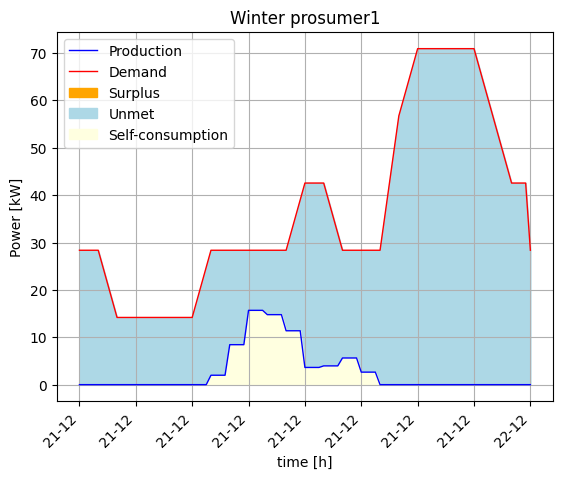

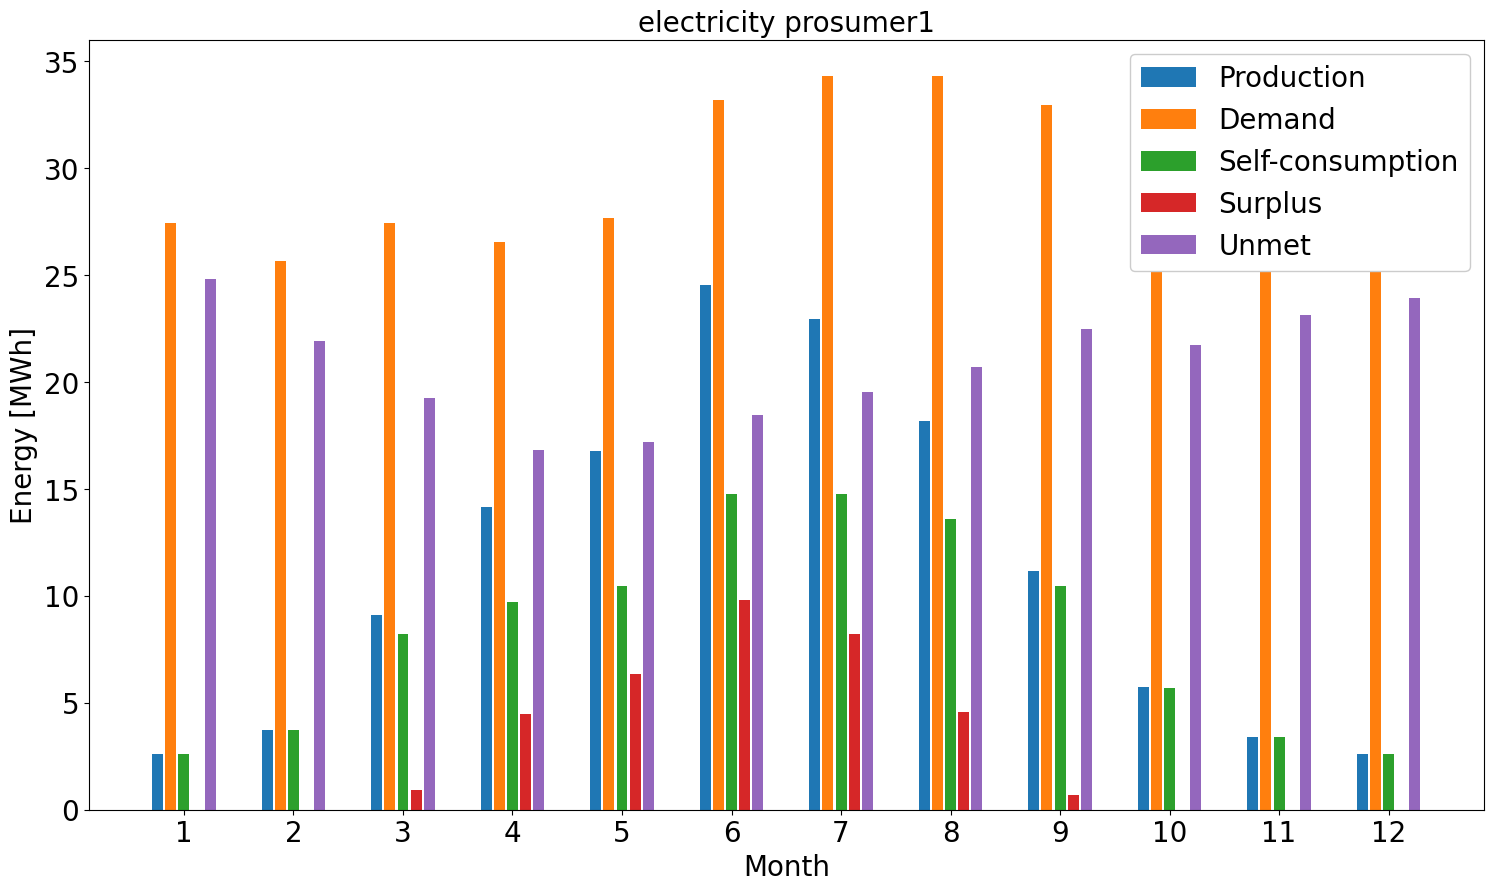

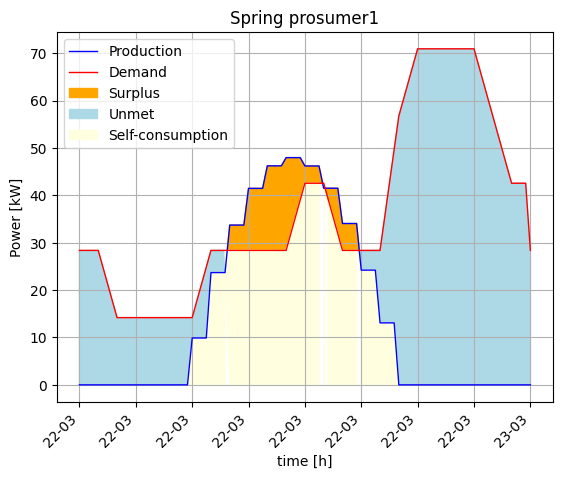

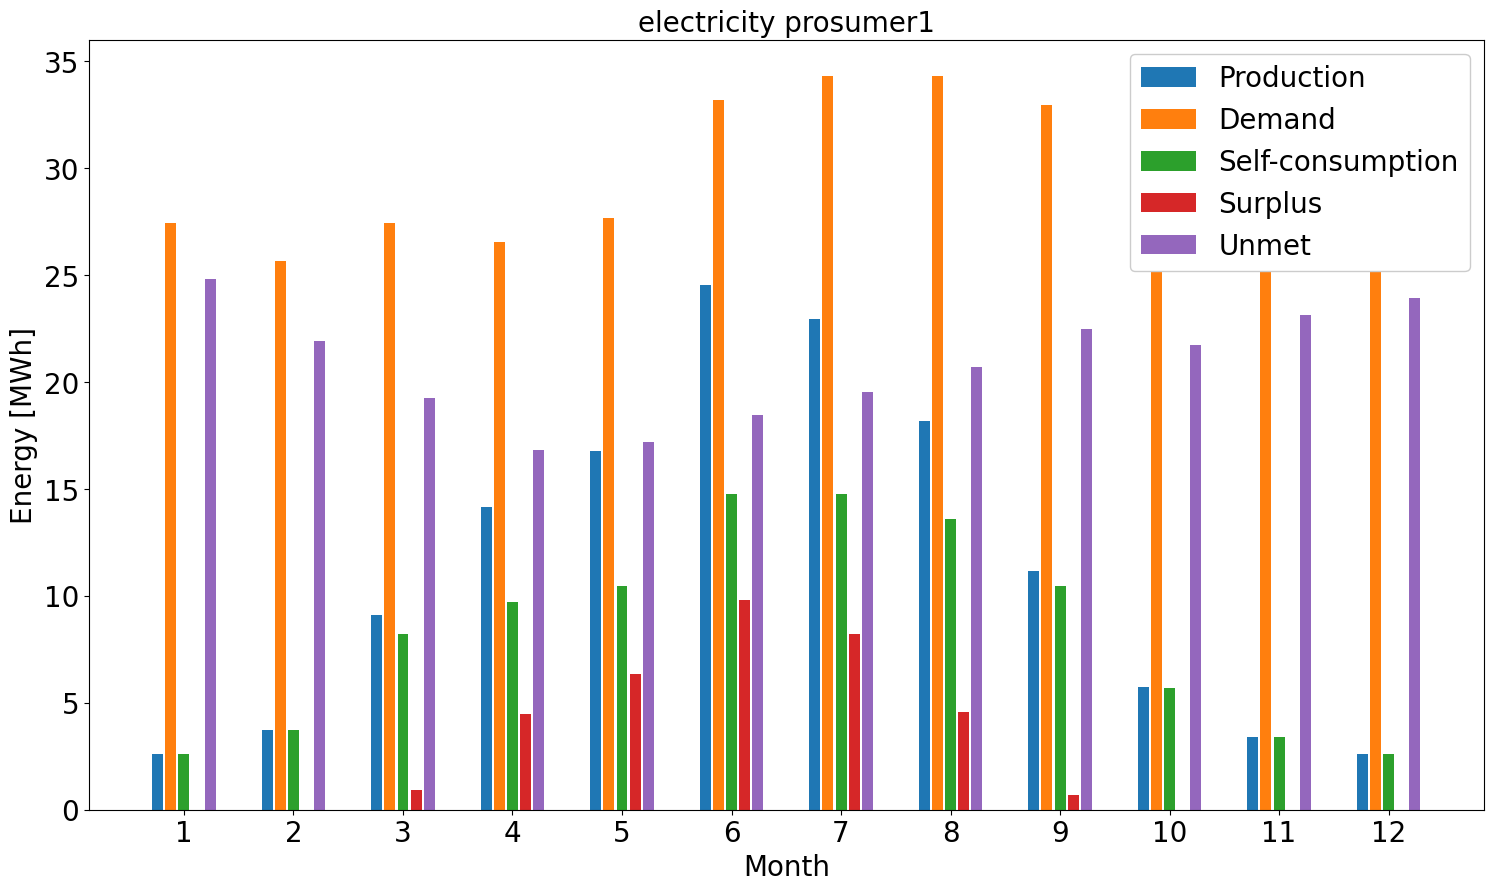

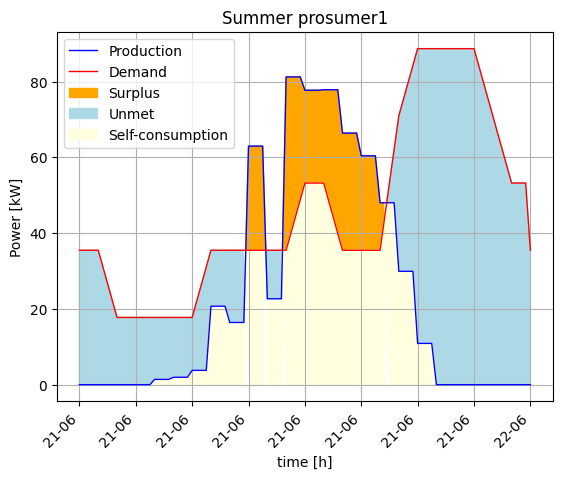

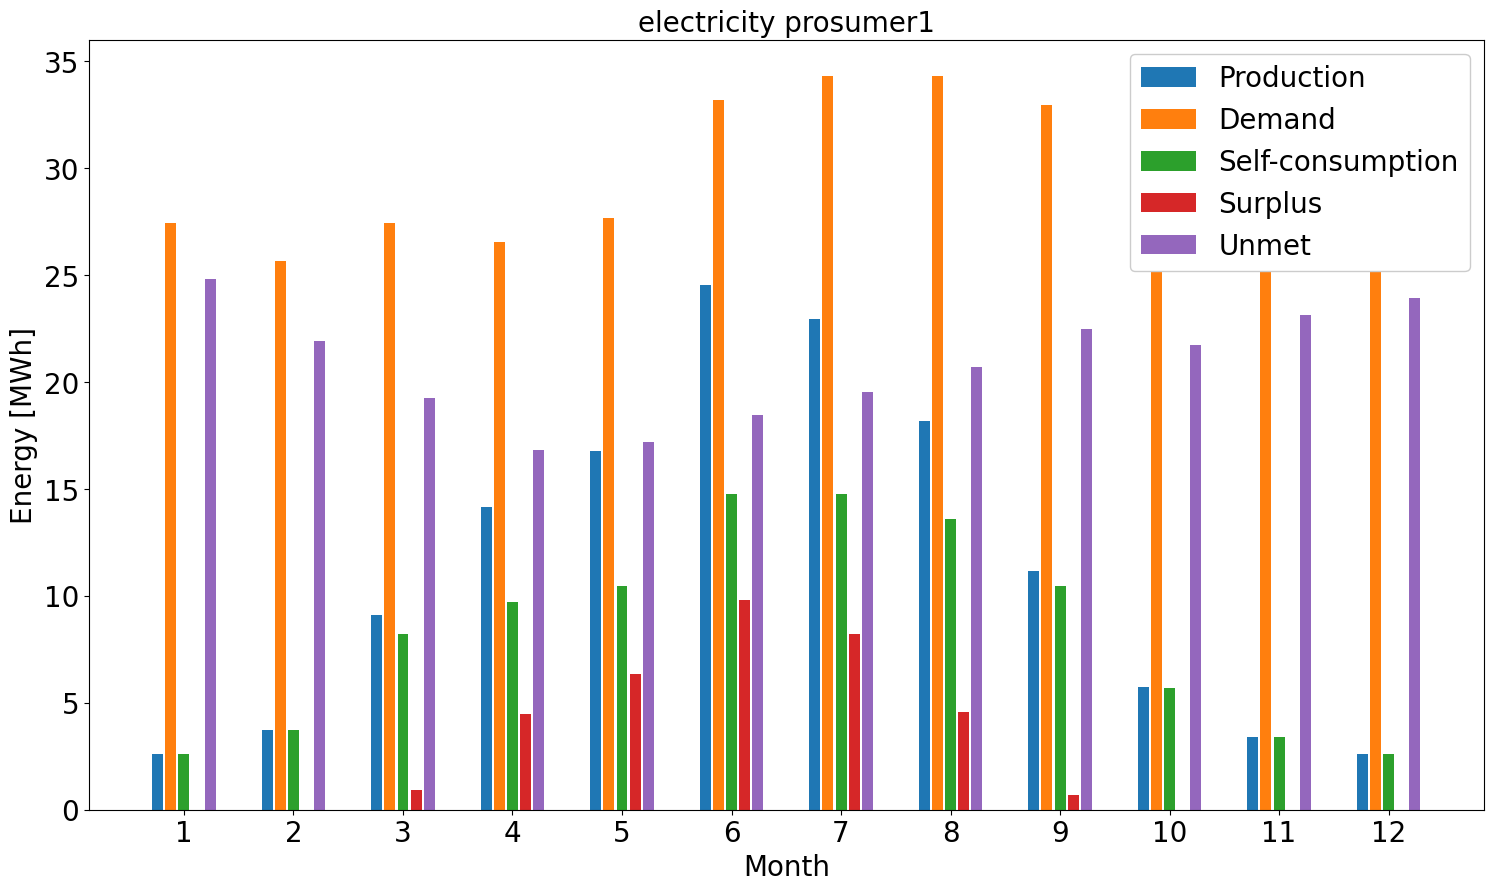

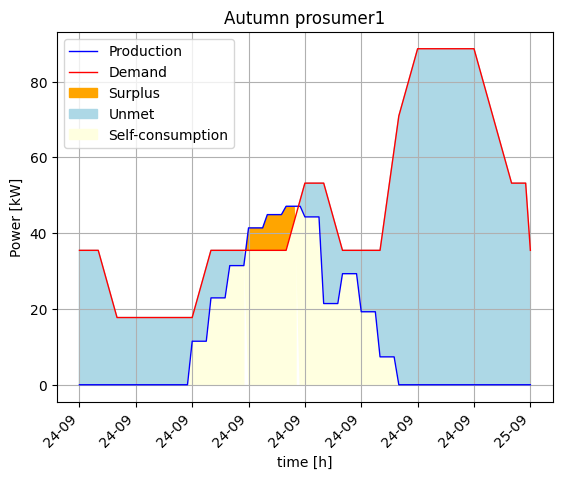

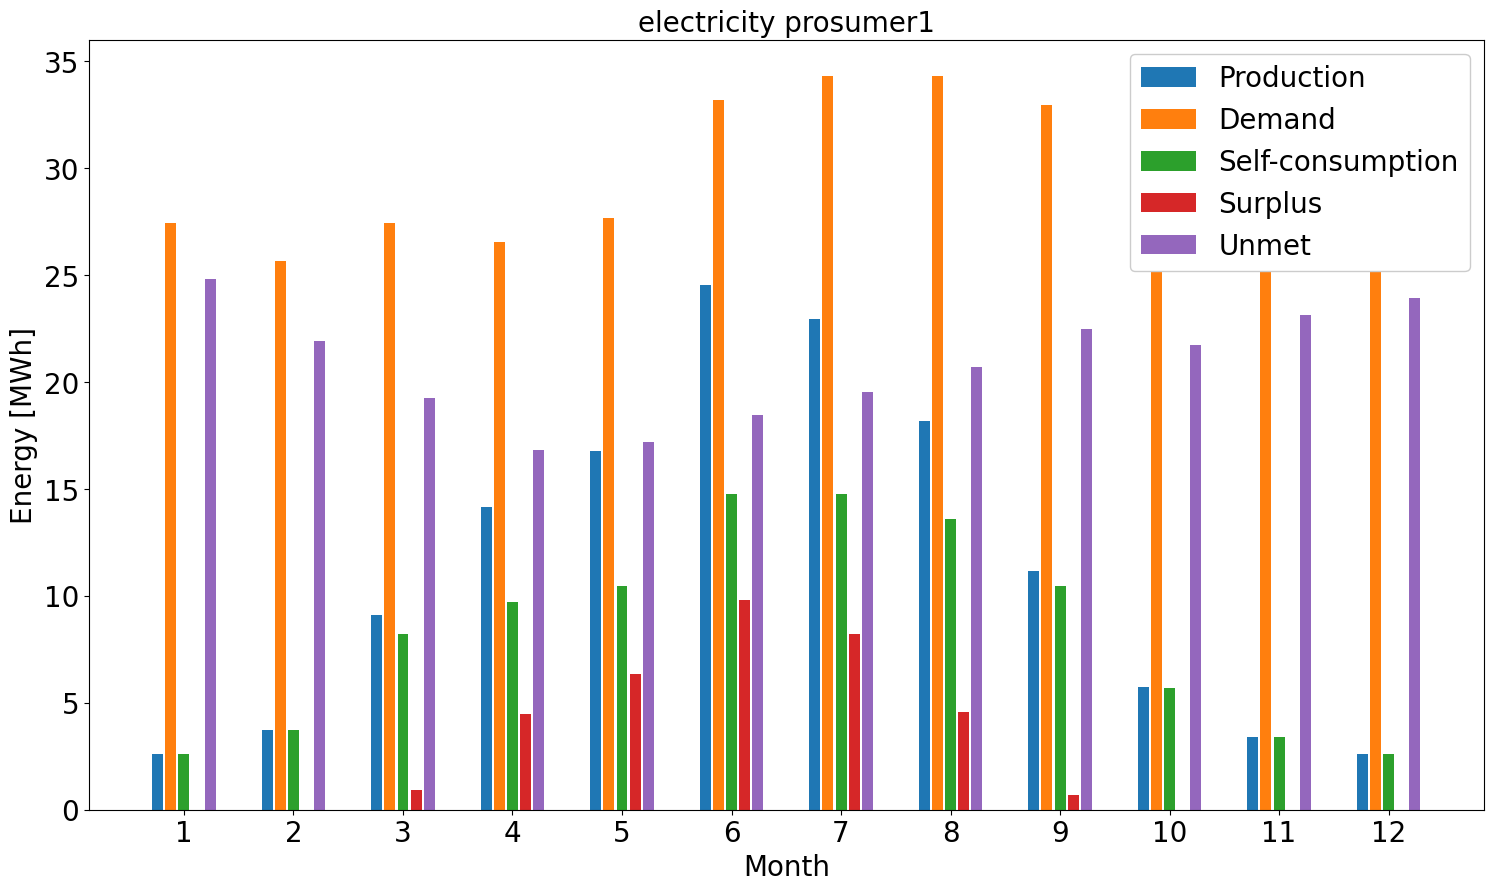

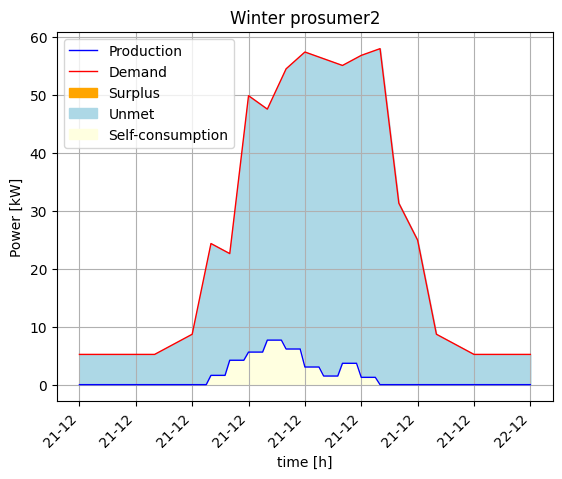

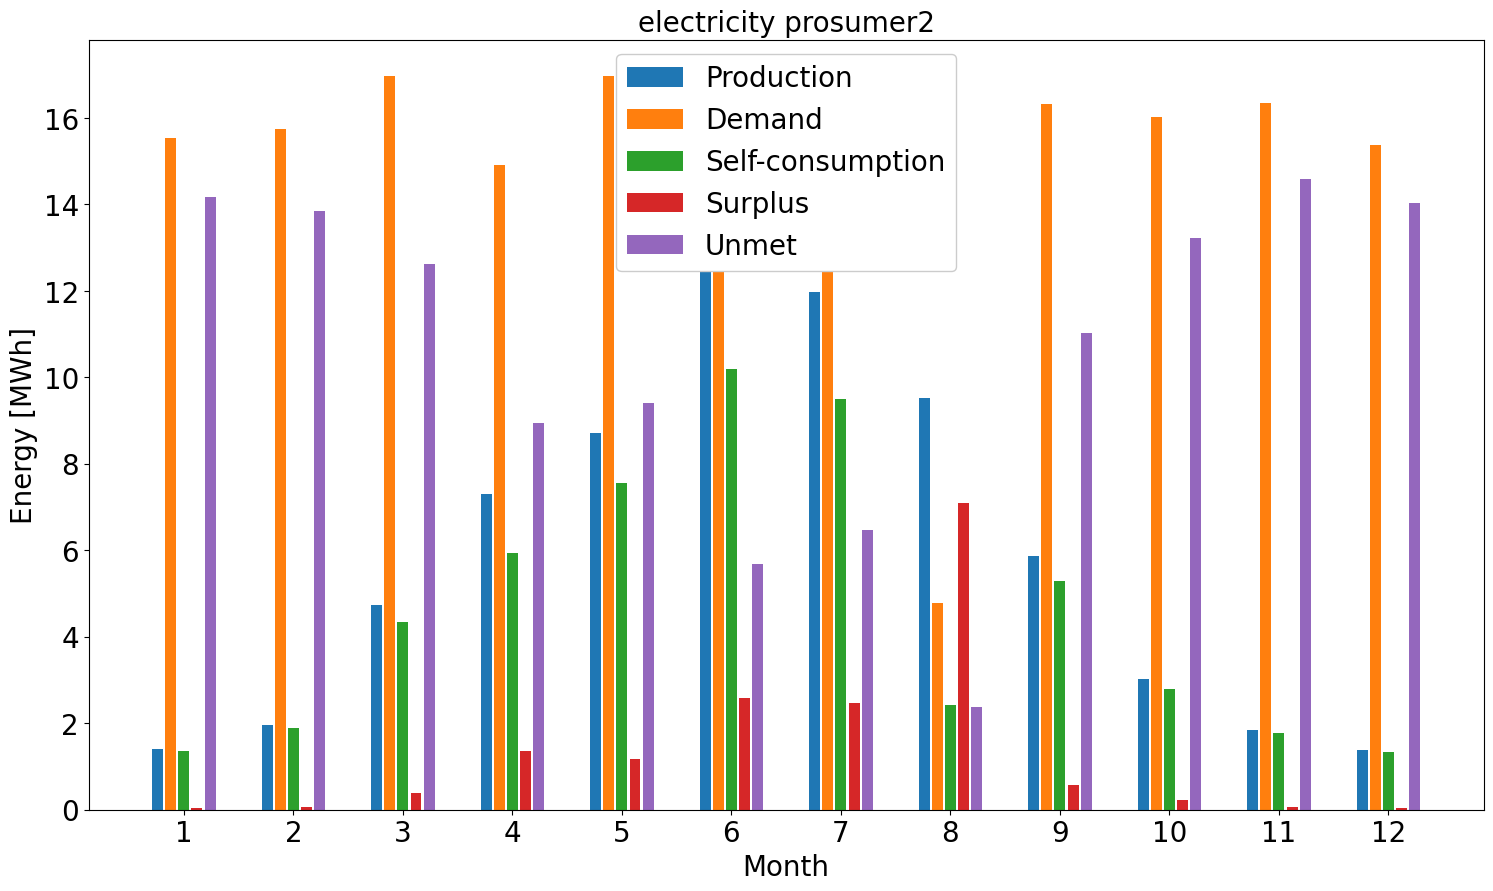

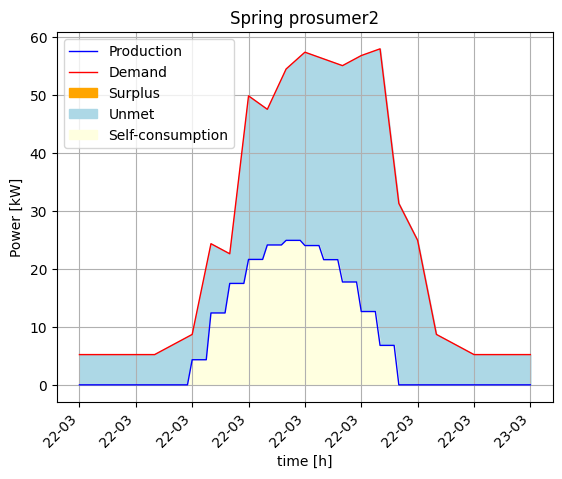

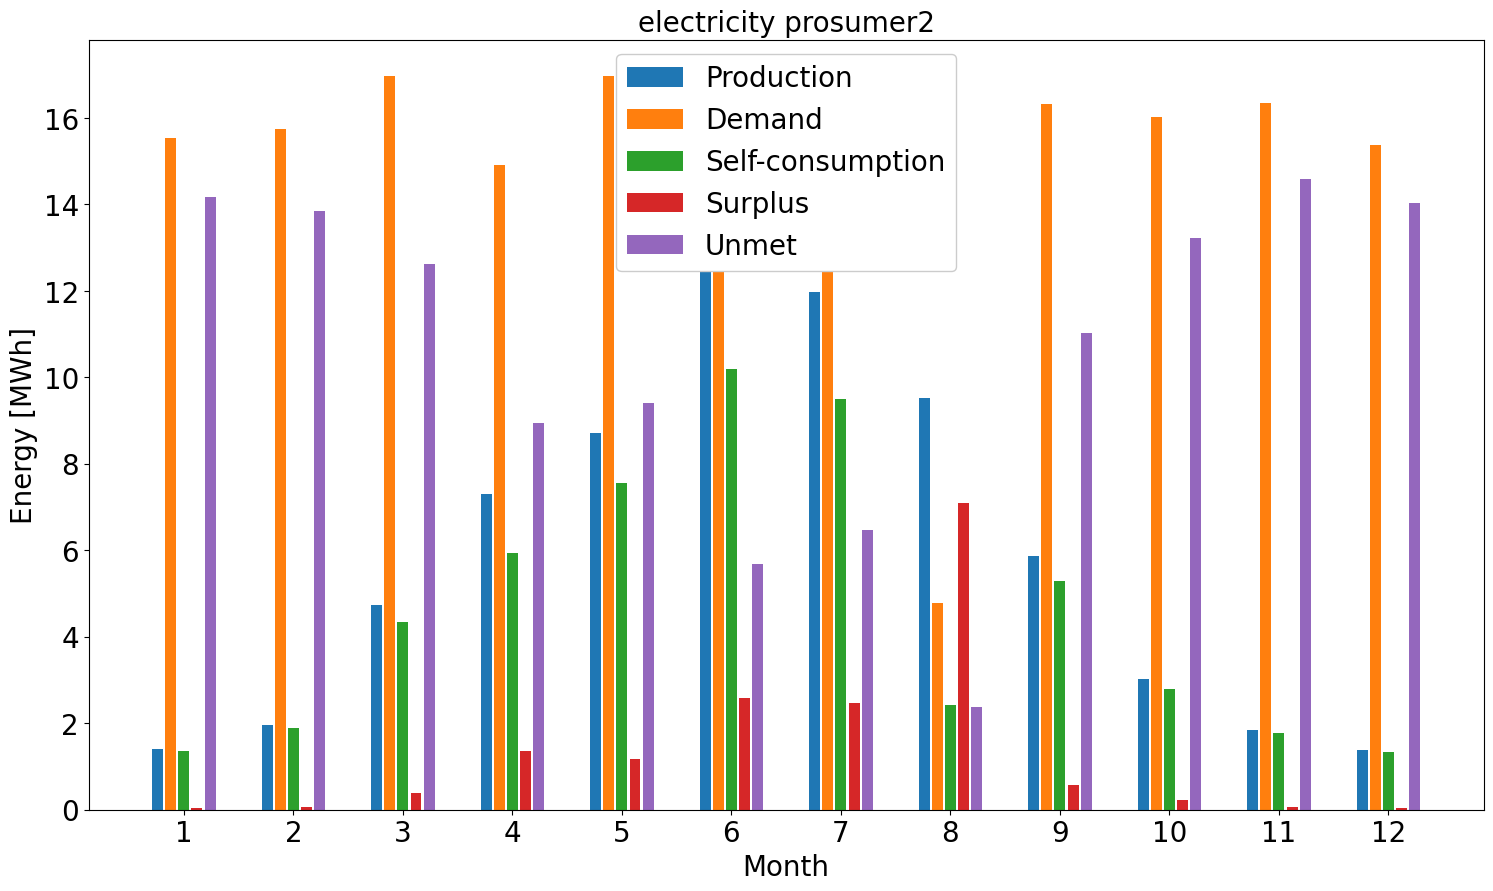

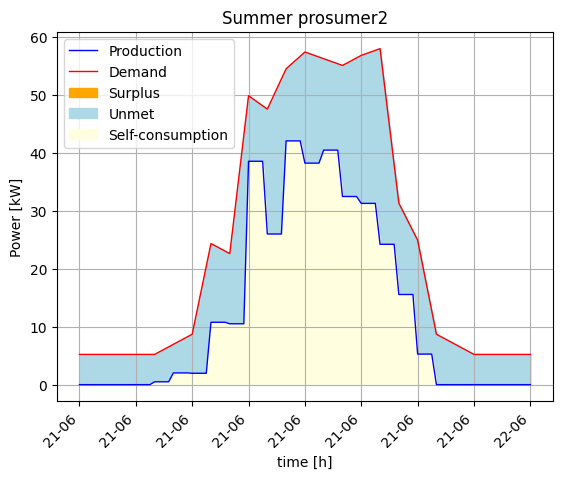

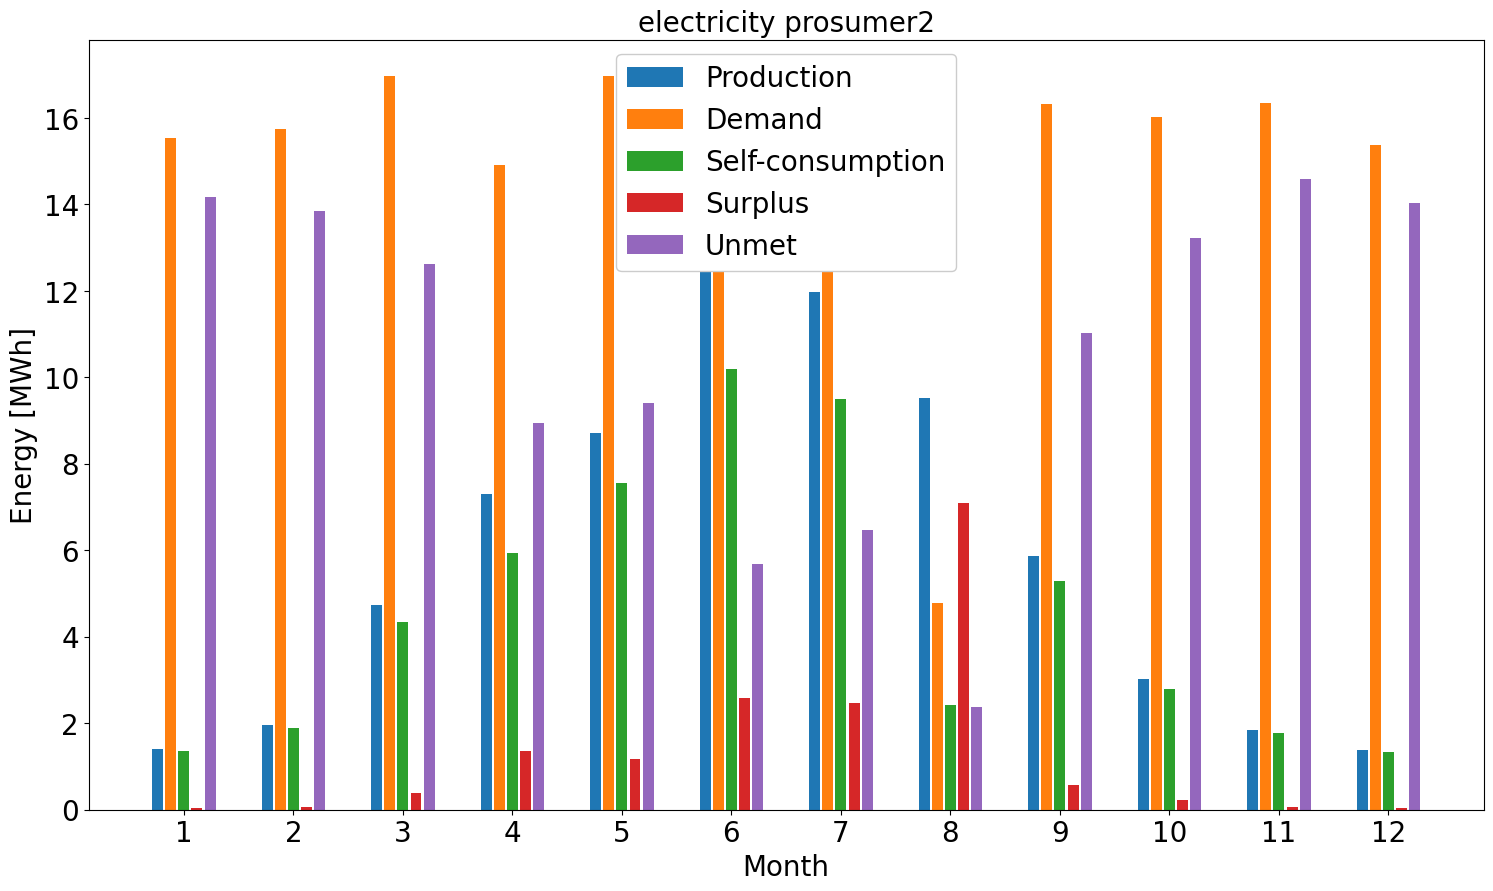

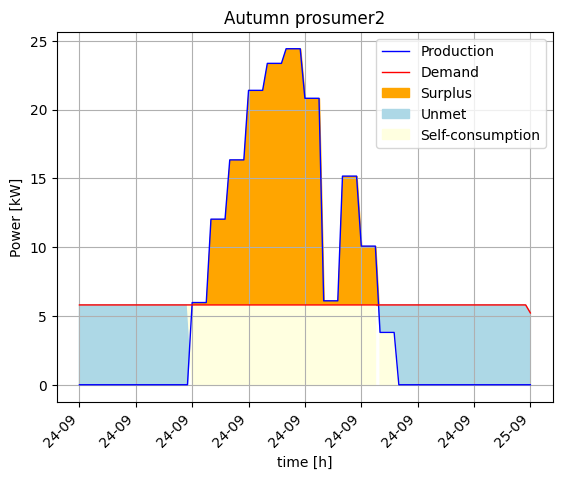

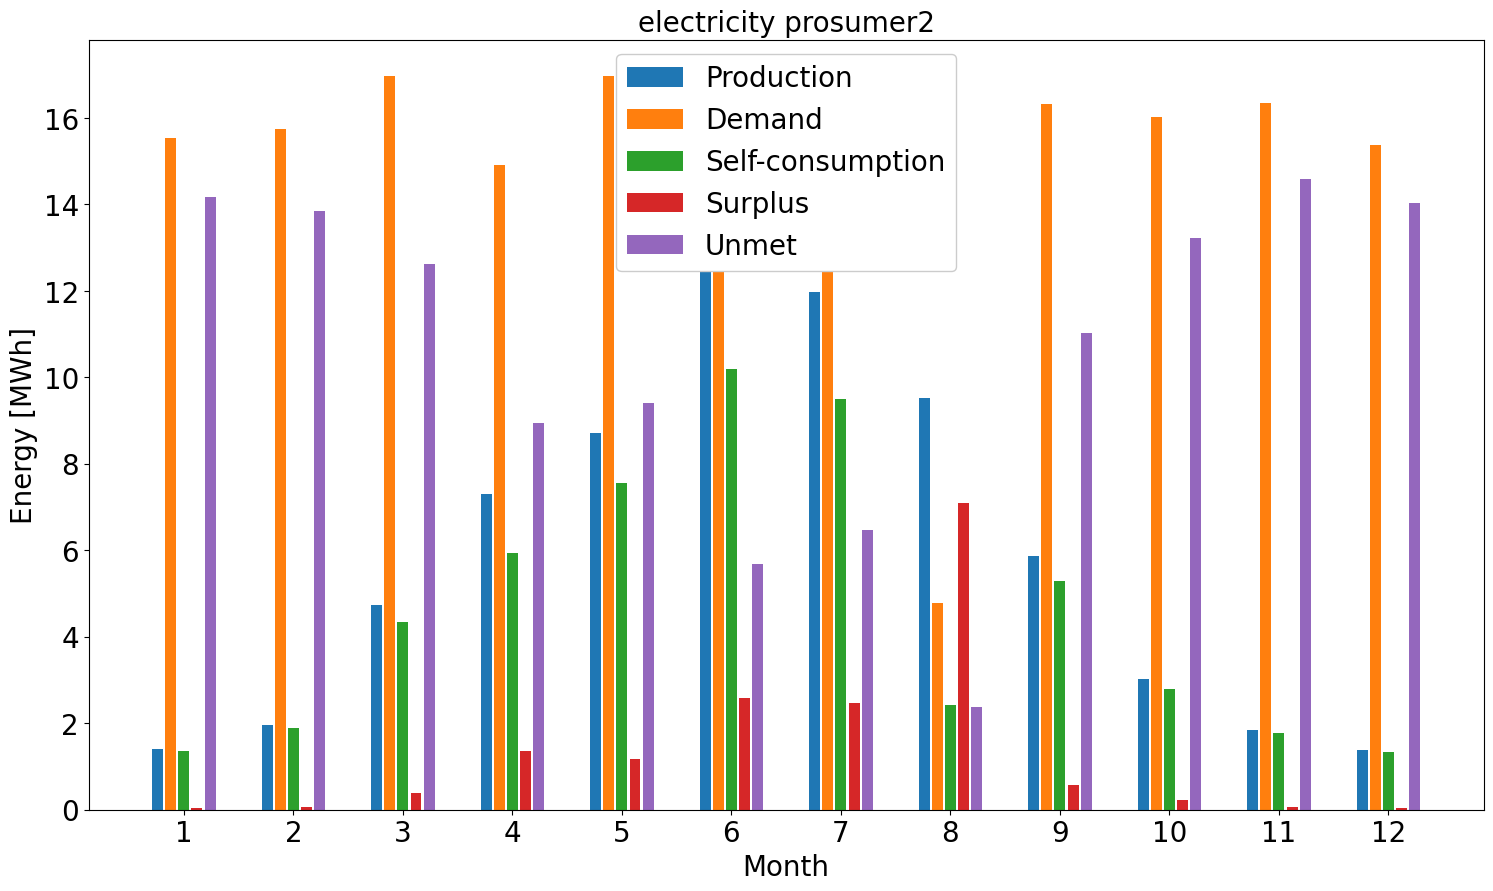

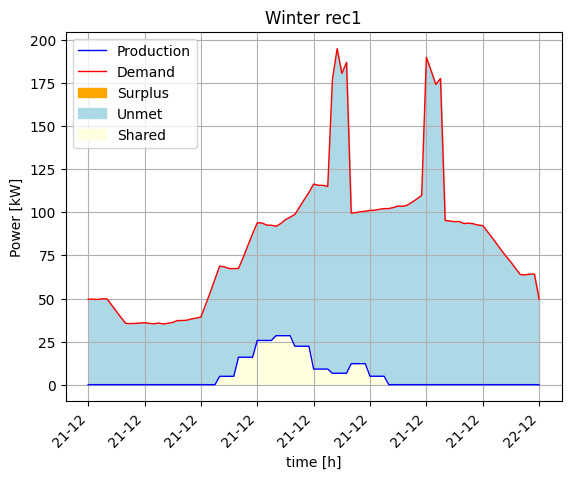

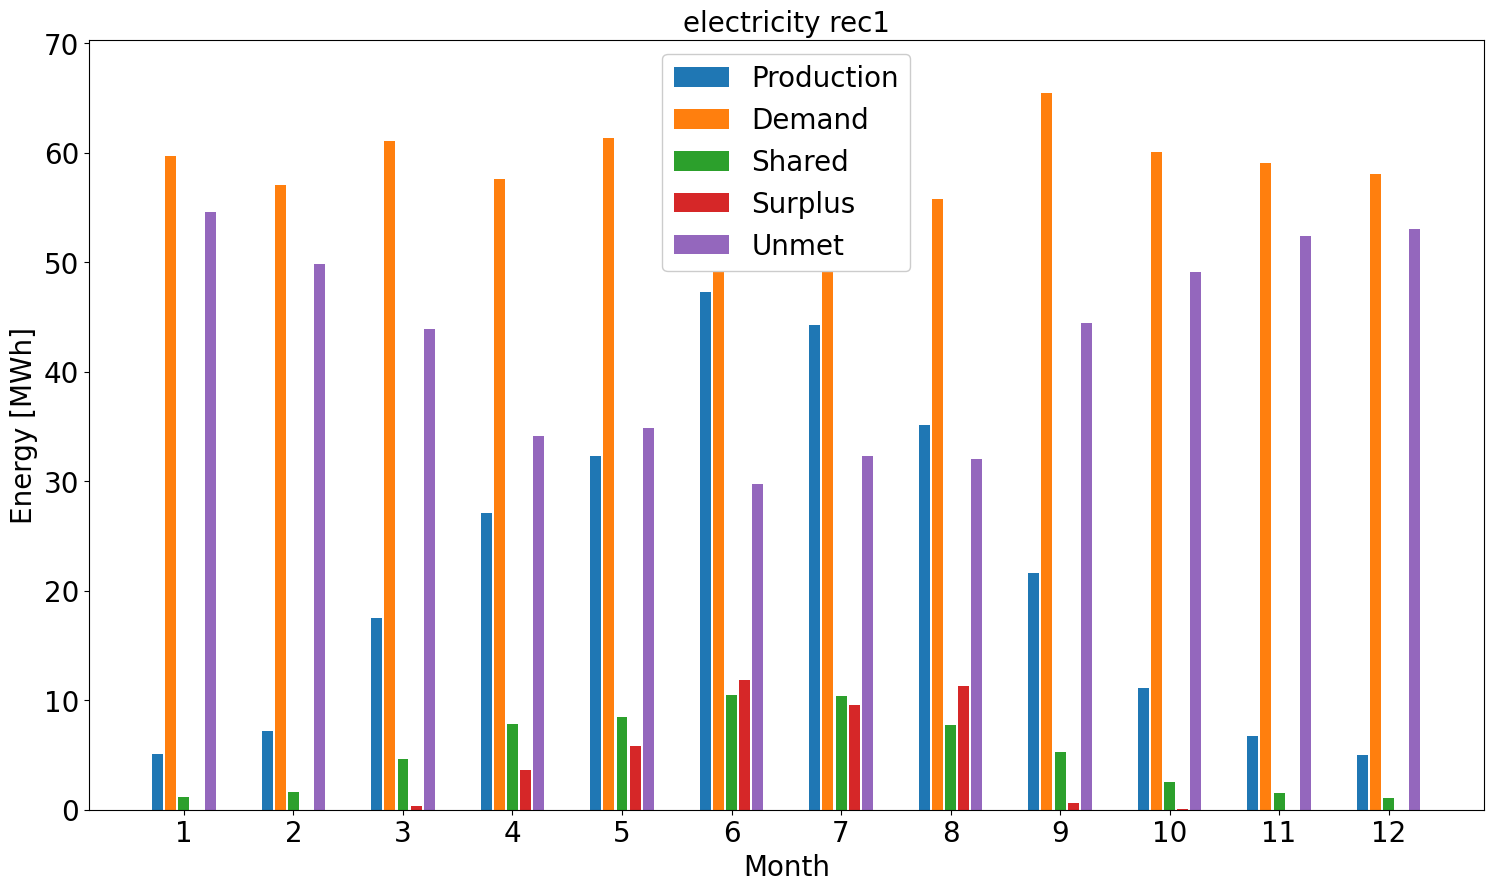

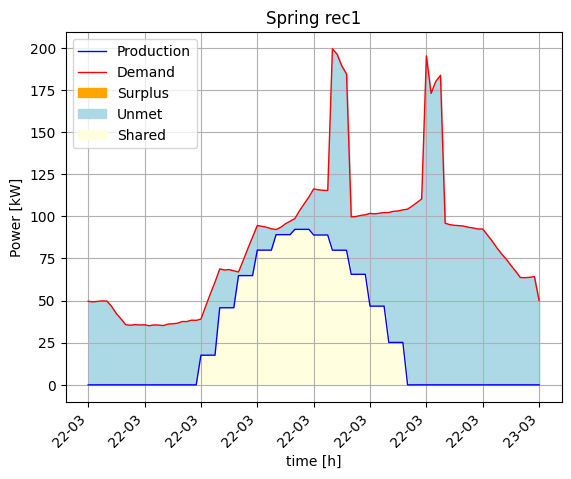

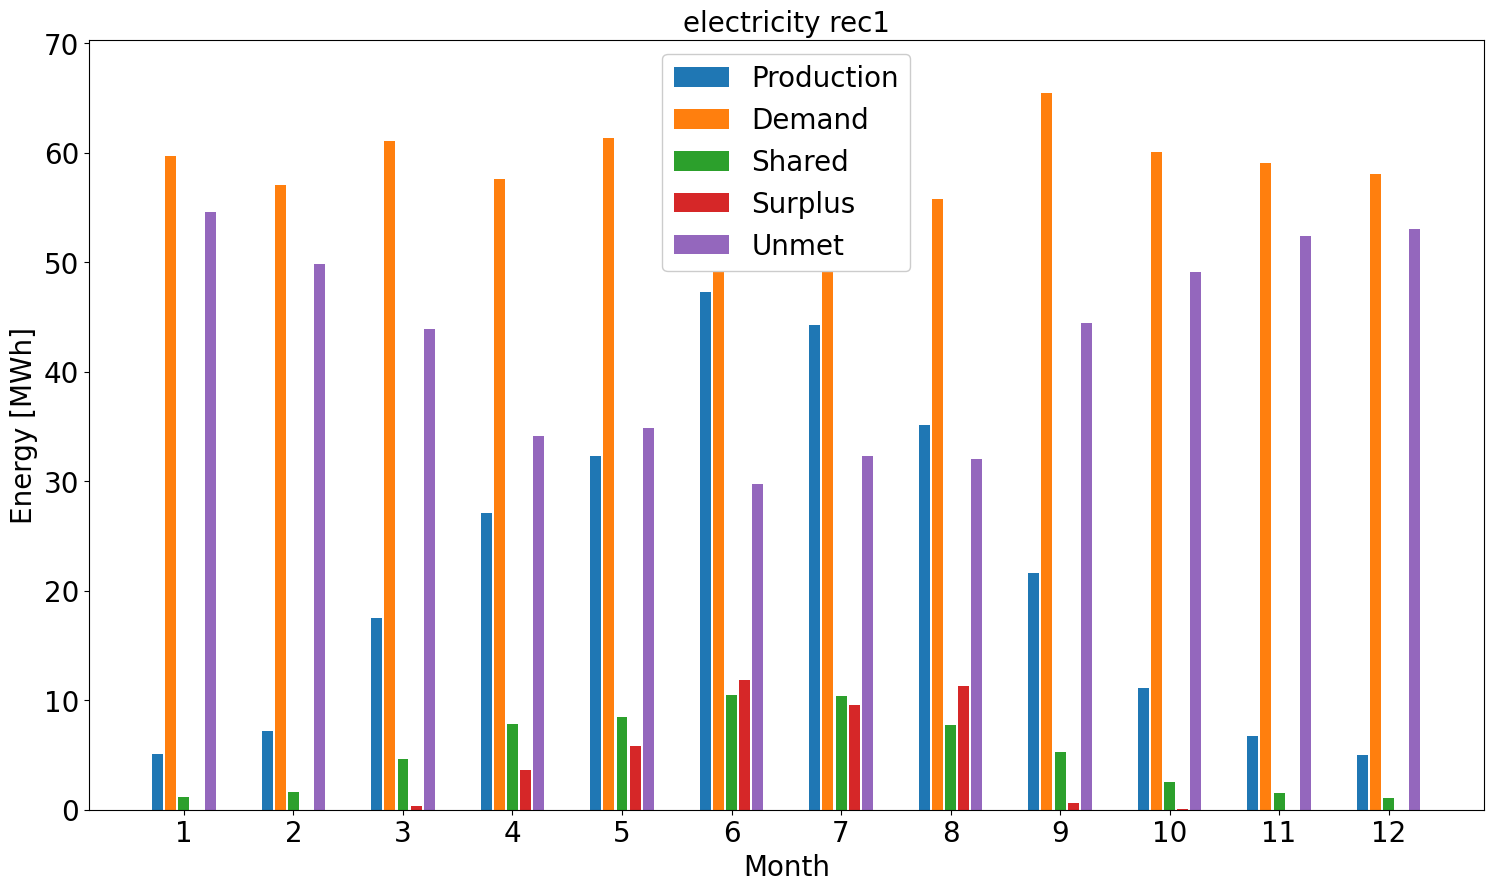

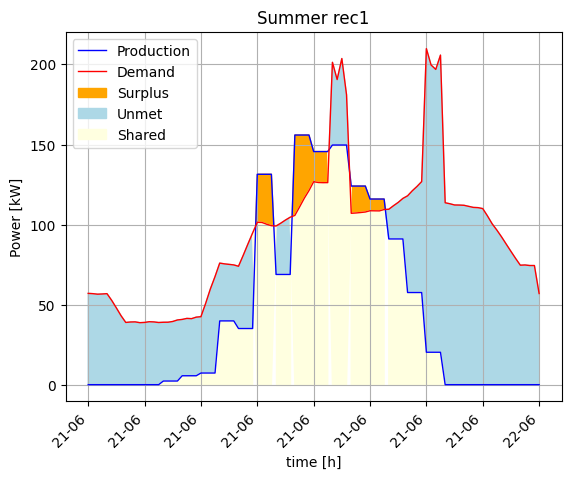

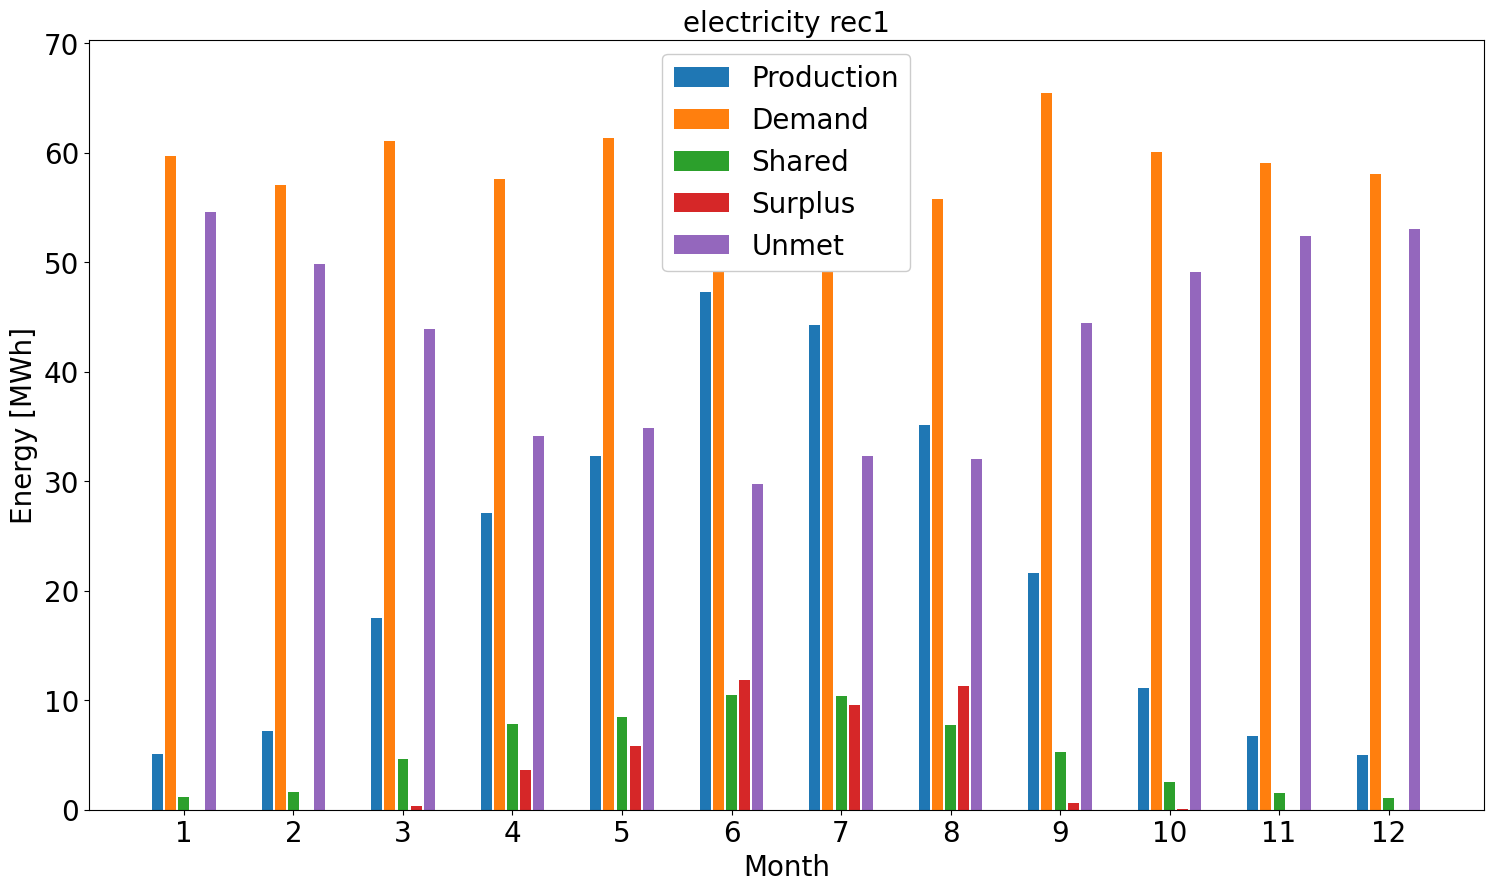

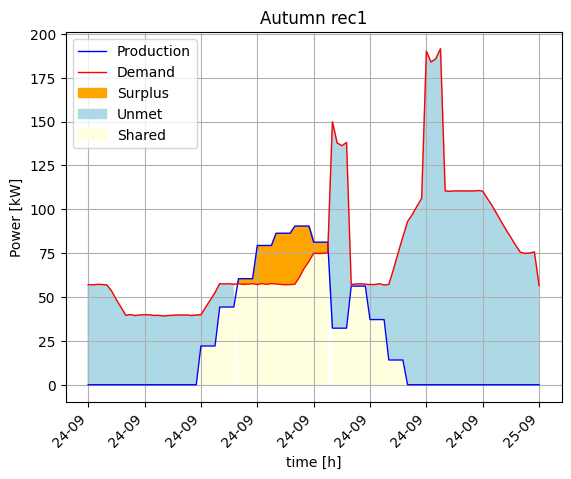

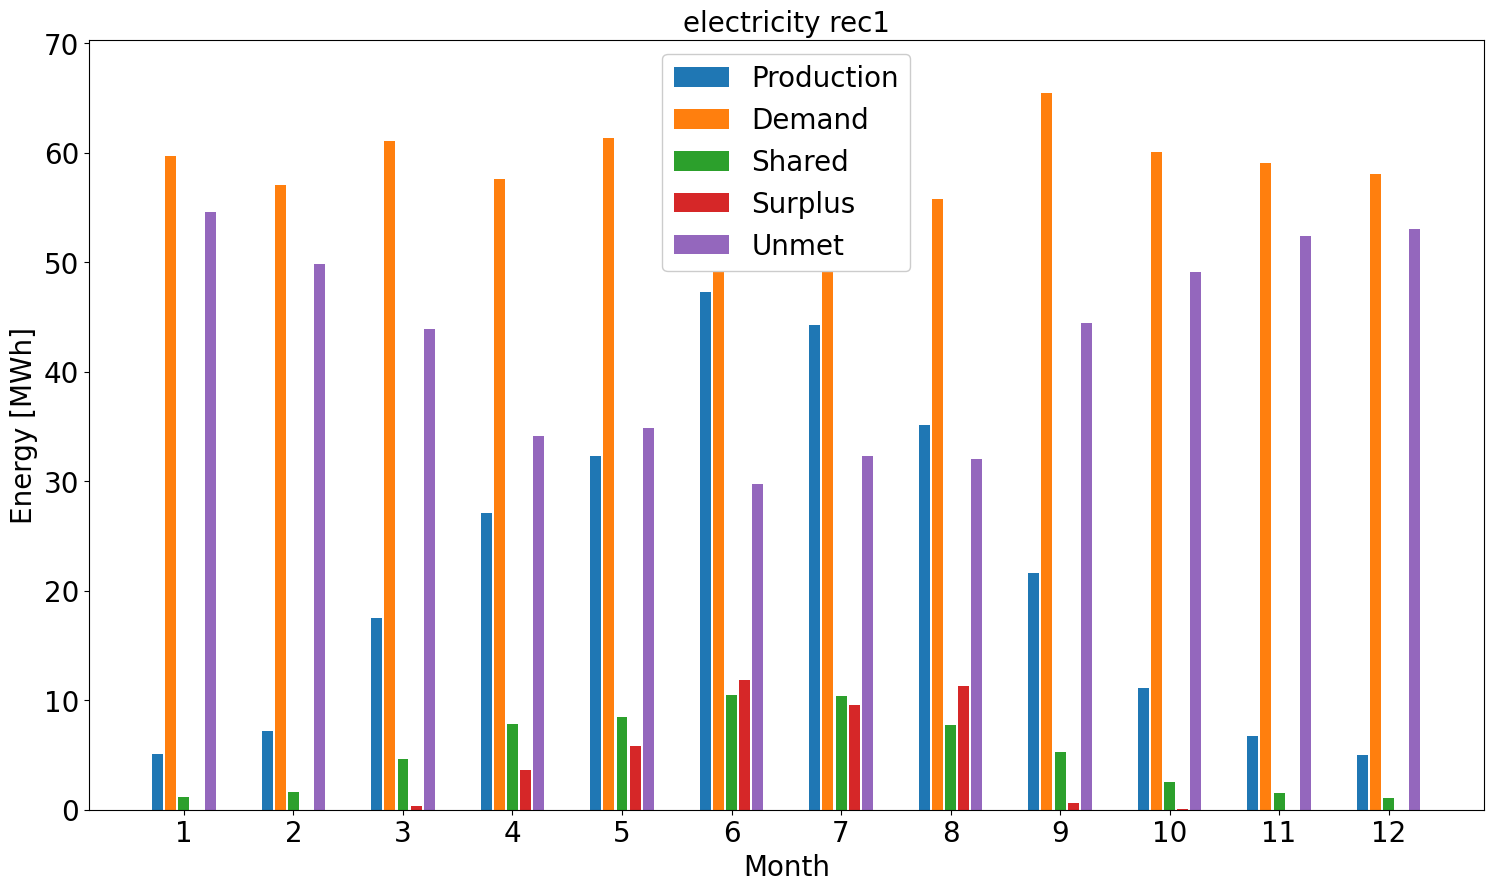

In [52]:
from src.kernel.plot_result import  * # import the plot function to visualize results

file_path_yaml = "Input/config.yaml" # read the YAML configuration docs from the Input folder
output_dir = Path(os.path.join(test_base,"Output/")) # specify the Output folder for saving results
simulation, all_components, rec_result, pros_result, rec_result_ec, pros_result_ec = run(file_path_yaml, base_path=test_base, output_dir=output_dir) # run the simulation
# Change the current working directory to the test_base folder
original_dir = os.getcwd()
os.chdir(test_base)

try:
    plot(simulation, all_components)
finally:
    # Restore the original working directory
    os.chdir(original_dir)

---
---

## **Step 5 - Check Results**


All simulation outputs are saved in:

```text
src/example_model/"test_base"/Output/
```


You’ll find:

- Seasonal plots for each prosumer (prosumer1_electricity_Winter.png, etc.)

- Bar plots summarizing annual performance of each prosumer (prosumer1_electricity_bar.png, etc.)

- Aggregated results for the REC (rec1_electricity_Winter.png,rec1_electricity_bar.png, etc.)

- Excel files with time series results for each prosumer and the REC (prosumers_en_perf_evolution_kW.csv, etc.)

- Excel files with economic performance for each prosumer and the REC (prosumers_ec_perf_€ .csv, etc.)


---
---

## **Detailed Results Description**
Prosumer results include the following variables for each energy carrier:
- prod: energy production (kW)
- dem: energy demand (kW)
- selfcons : self-consumption (kW) defined as the minimum between production and demand in each time step. If BESS is present, self-consumption includes the energy stored in the BESS.
- surplus : surplus production (kW) defined as the production exceeding the demand in each time step. If BESS is present, it takes in account the energy stored in the BESS.
- unmet	: deficit (kW) defined as the demand exceeding the production in each time step. If BESS is present, it takes in account the energy supplied by the BESS.
- stored : energy stored in BESS (kW)
- supply : energy supplied by BESS (kW)	
- power	: energy exchanged with BESS (kW)
- soc : state of charge of BESS (%)

Rec results include the following variables for each energy carrier:
- prod : energy production (kW) from all prosumers and REC systems
- prod_net : net energy production (kW) defined as the total production from all prosumers and REC systems minus self-consumption from all prosumers.
- prod_rec : energy production (kW) from REC systems only
- dem : energy demand (kW) from all consumers and prosumers
- dem_net : net energy demand (kW) defined as the total demand from all consumers and prosumers minus self-consumption from all prosumers.
- shared : shared energy (kW) defined as the minimum between net energy production and net energy demand in each time step. If BESS is present, shared includes the energy stored in the BESS.
- surplus_prosumer : surplus production from all prosumers (kW)
- selfcons_prosumer : self-consumption from all prosumers (kW)
- unmet_prosumers	: deficit from all prosumers and consumers (kW)
- surplus: surplus production from all prosumers and REC systems (kW)
- unmet	: deficit from all prosumers and consumers (kW)
- stored : energy stored in BESS managed by REC (kW)	
- supply : energy supplied by BESS managed by REC (kW)	
- power	: energy exchanged with BESS managed by REC (kW)
- soc : state of charge of BESS managed by REC (%)

---
---